W pierwszym kroku zostanie wygenerowany indywidualny zestaw danych. Zestaw ten składa się z pewnej liczby obiektów opisanych pewną liczbą atrybutów opisująych (cech, zmiennych), naleących do pewnej liczby klas (kategorii). Przynależność do klasy jest zapisana w ostatnim atrybucie (decyzyjnym, opisywanym). Zestaw danych zostanie wygeneroowany na podstawie podanego numeru(zmienna `numer`).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

numer = "319098" 
    
n = np.array(list(numer),dtype = int)
cechy, klasa = make_classification(n_samples=  (n[1]*11+n[2]*10+n[0])*6,  n_classes = n[-1]%3+5, class_sep = n[-4]%2 + 3, n_clusters_per_class = 2, n_features = 12 - n[-4]%2, n_redundant = 2 - n[-3]%3, n_repeated = n[-3]%2 + 2, n_informative = n[-2]%4+4,random_state = n[5]+n[1]+n[0]+n[2])
cechy[(np.random.random(cechy.shape) < 0.04)]=np.nan    
dane0 = pd.concat([pd.DataFrame(cechy), pd.DataFrame(klasa, columns =['klasa'])],axis = 1, sort=False)

In [2]:
dane0


,0,1,2,3,4,5,6,7,8,9,10,klasa
0,1.922206,4.059063,-4.476574,1.922206,3.610091,1.922206,-0.555511,-0.297625,-4.696655,1.672911,3.871291,5
1,-4.049456,-4.916513,2.973853,-4.049456,-4.586167,-4.049456,-0.441657,-0.532970,5.857745,-1.515715,-4.327749,3
2,0.456362,2.520422,-5.534677,0.456362,-3.692973,0.456362,-2.164788,-1.680776,2.830167,1.190415,4.935569,2
3,2.208150,NaN,3.630214,2.208150,-4.825534,2.208150,0.498159,0.346537,4.749433,-2.676103,-4.647894,0
4,12.834869,4.403469,3.519587,12.834869,-5.785298,12.834869,-0.034117,0.409505,-5.389098,-1.138835,5.373445,3
...,...,...,...,...,...,...,...,...,...,...,...,...
619,-6.048262,-4.312930,-3.927955,-6.048262,3.866349,-6.048262,-0.665735,0.221170,3.913470,2.902804,4.850402,4
620,2.499722,-3.878073,4.078139,2.499722,3.836366,2.499722,1.631603,-2.641198,-4.049628,0.869560,3.207479,2
621,0.120830,5.372033,1.944843,0.120830,4.889779,0.120830,0.298566,-0.167859,4.068702,-0.857453,NaN,5
622,-5.983546,-5.677782,-3.951474,-5.983546,-4.736968,-5.983546,0.638929,2.120010,-3.299571,0.024479,-2.962692,1


---

Dla zbioru `dane0` wyznaczanie poniższych danych:
* łączna liczbę obiektów (obserwacji)
* liczbę klas 
* liczbę obiektów w każdej klasie
* liczbę atrybutów/cech
* liczbę brakujących danych

Na potrzeby dalszej analizy usunięto obiekty z brakującymi danymi i zapisano w zmiennej `dane1`.

In [3]:
# liczba obiektów
ile_obiektow = len(dane0.index)
print("obiektów:", ile_obiektow)

# liczba klas
print("liczba klas: ", len(dane0.groupby("klasa").size().index))

# liczba obiektów w każdej klasie
print("liczba obiektow w klasach:")
print(dane0.groupby("klasa").size())

# liczba atrybutów
print("liczba atrybutów: ", len(dane0.columns))

# liczba danych brakujących
print("liczba wierszy z danymi brakujacymi: ", sum(dane0.apply(lambda x: sum(x.isnull().values), axis = 1)>0))
print("liczba danych brakujacych: ", dane0.isnull().sum().sum())

# usunięcie danych brakujących
dane1 = dane0.dropna()

obiektów: 624
liczba klas:  7
liczba obiektow w klasach:
klasa
0    91
1    89
2    89
3    89
4    88
5    89
6    89
dtype: int64
liczba atrybutów:  12
liczba wierszy z danymi brakujacymi:  233
liczba danych brakujacych:  290


Analiza zmienność poszczególnych (pojedynczych) atrybutów w pliku `dane1` w całym zbiorze (bez odniesienia do klas) oraz odrębnie w poszczególnych klasach. Wyniki przedstawiono na odpowiednich wykresach.

0        5.039447
1        3.943194
2        4.124288
3        5.039447
4        3.941259
5        5.039447
6        0.999464
7        0.983859
8        4.169756
9        1.647015
10       4.129187
klasa    1.962238
dtype: float64


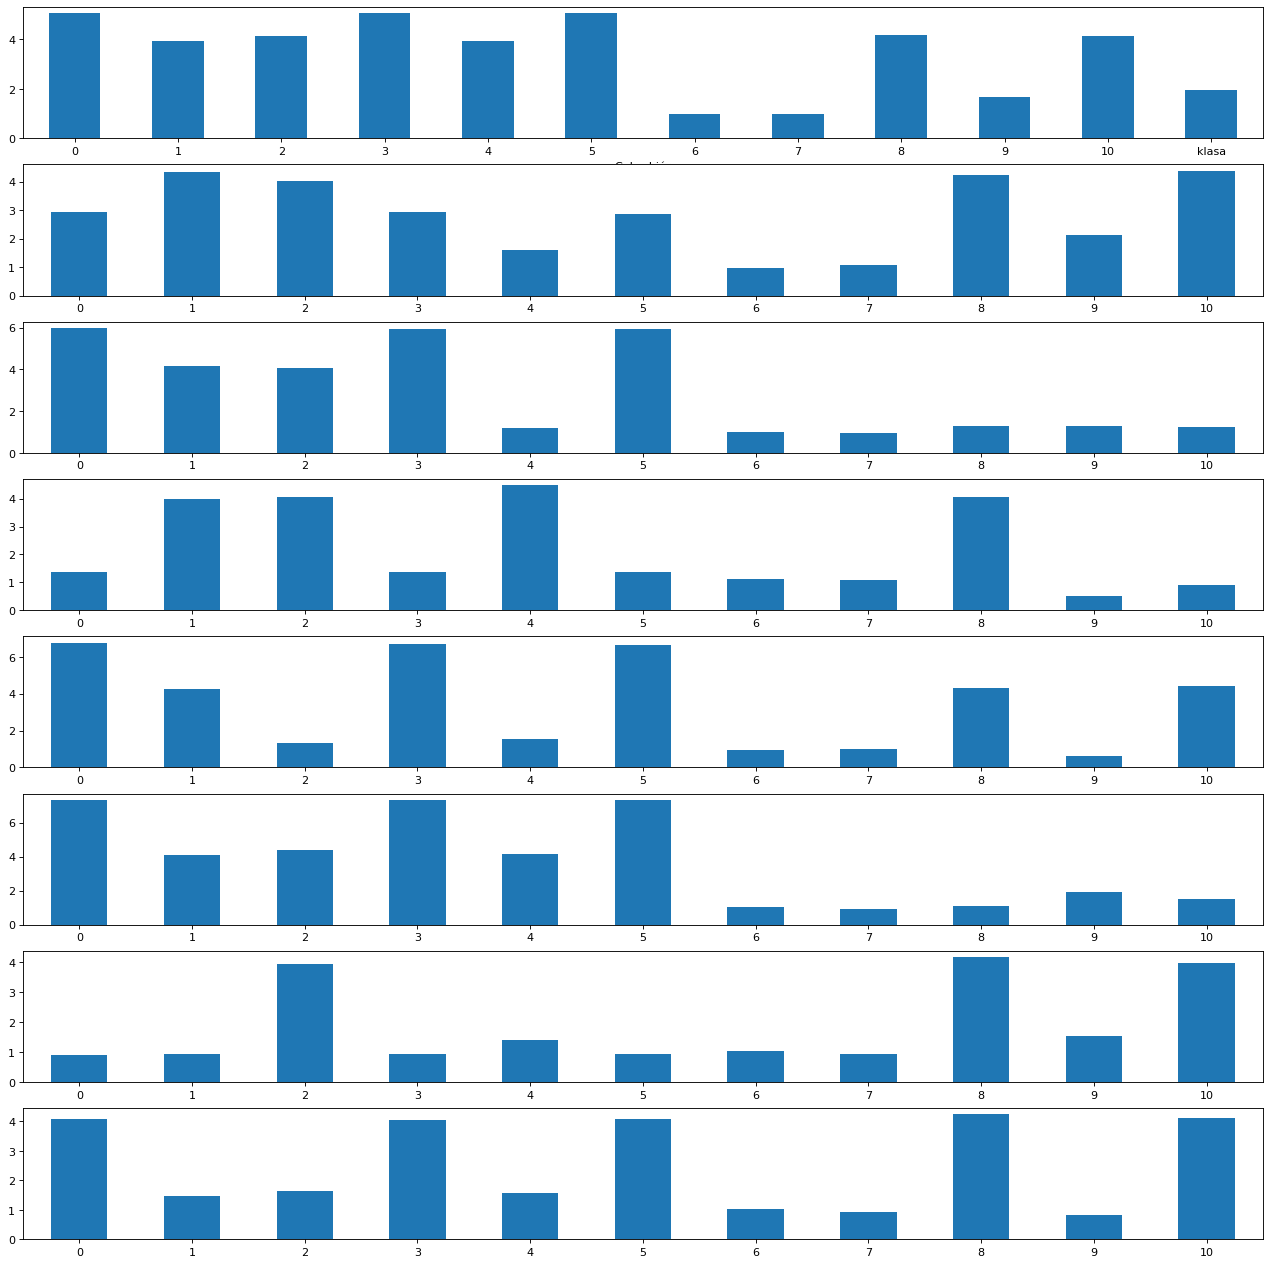

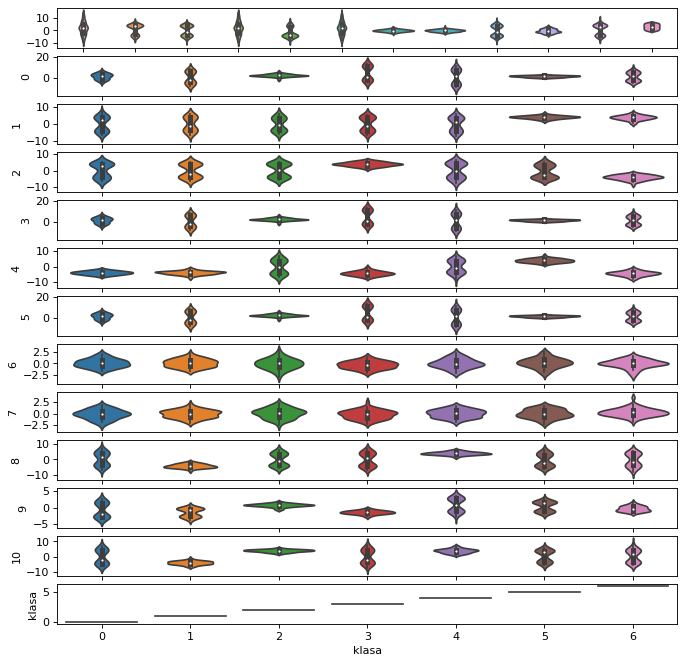

In [4]:
print(dane1.std())
plt.figure(figsize=(20,20), dpi= 80)
plt.subplot(8, 1, 1)
ax = dane1.std().plot.bar(rot=0);
ax.set(xlabel="Cały zbiór")

classes = dane1.klasa.drop_duplicates().sort_values()
for i in classes:
    cla = dane0[dane0.klasa == i].drop(columns='klasa')
    plt.subplot(8, 1, i+2)
    ax = cla.std().plot.bar(rot=0)
 

plt.figure(figsize=(10,10), dpi= 80)
plt.subplot(13,1,1)
sns.violinplot(data=dane1)
j = 2
for i in dane0.columns:
    plt.subplot(13,1,j)
    sns.violinplot(x="klasa", y = i, data=dane1)
    j+=1




*wnioski*
* Poszczególne klasy charakteryzują sie niskim odchyleniem standardowym konkretnych atrybutów i są to unikatowe układy atrybótów, przykładowo: w klasie 5 odchylenie standardowe dla atrybówtów 6-10 jest znacznie niższe a w klasie 7 1,2,4,6,7,9
* Atrybuty 6 i 7 charakteryzuja się tym samym wykresem skrzypcowym dla każdej klasy i dla wszytskich są skupione wokół mediany


---
Na podstawie pierwotnie wygenerowanych danych (przed uszkodzeniem, zbiór `dane1`) oceniono:
1. stopień korelacji poszczególnych atrybutów,
2. które cechy pozwoliłyby na rozdzielenie poszczególnych klas. 

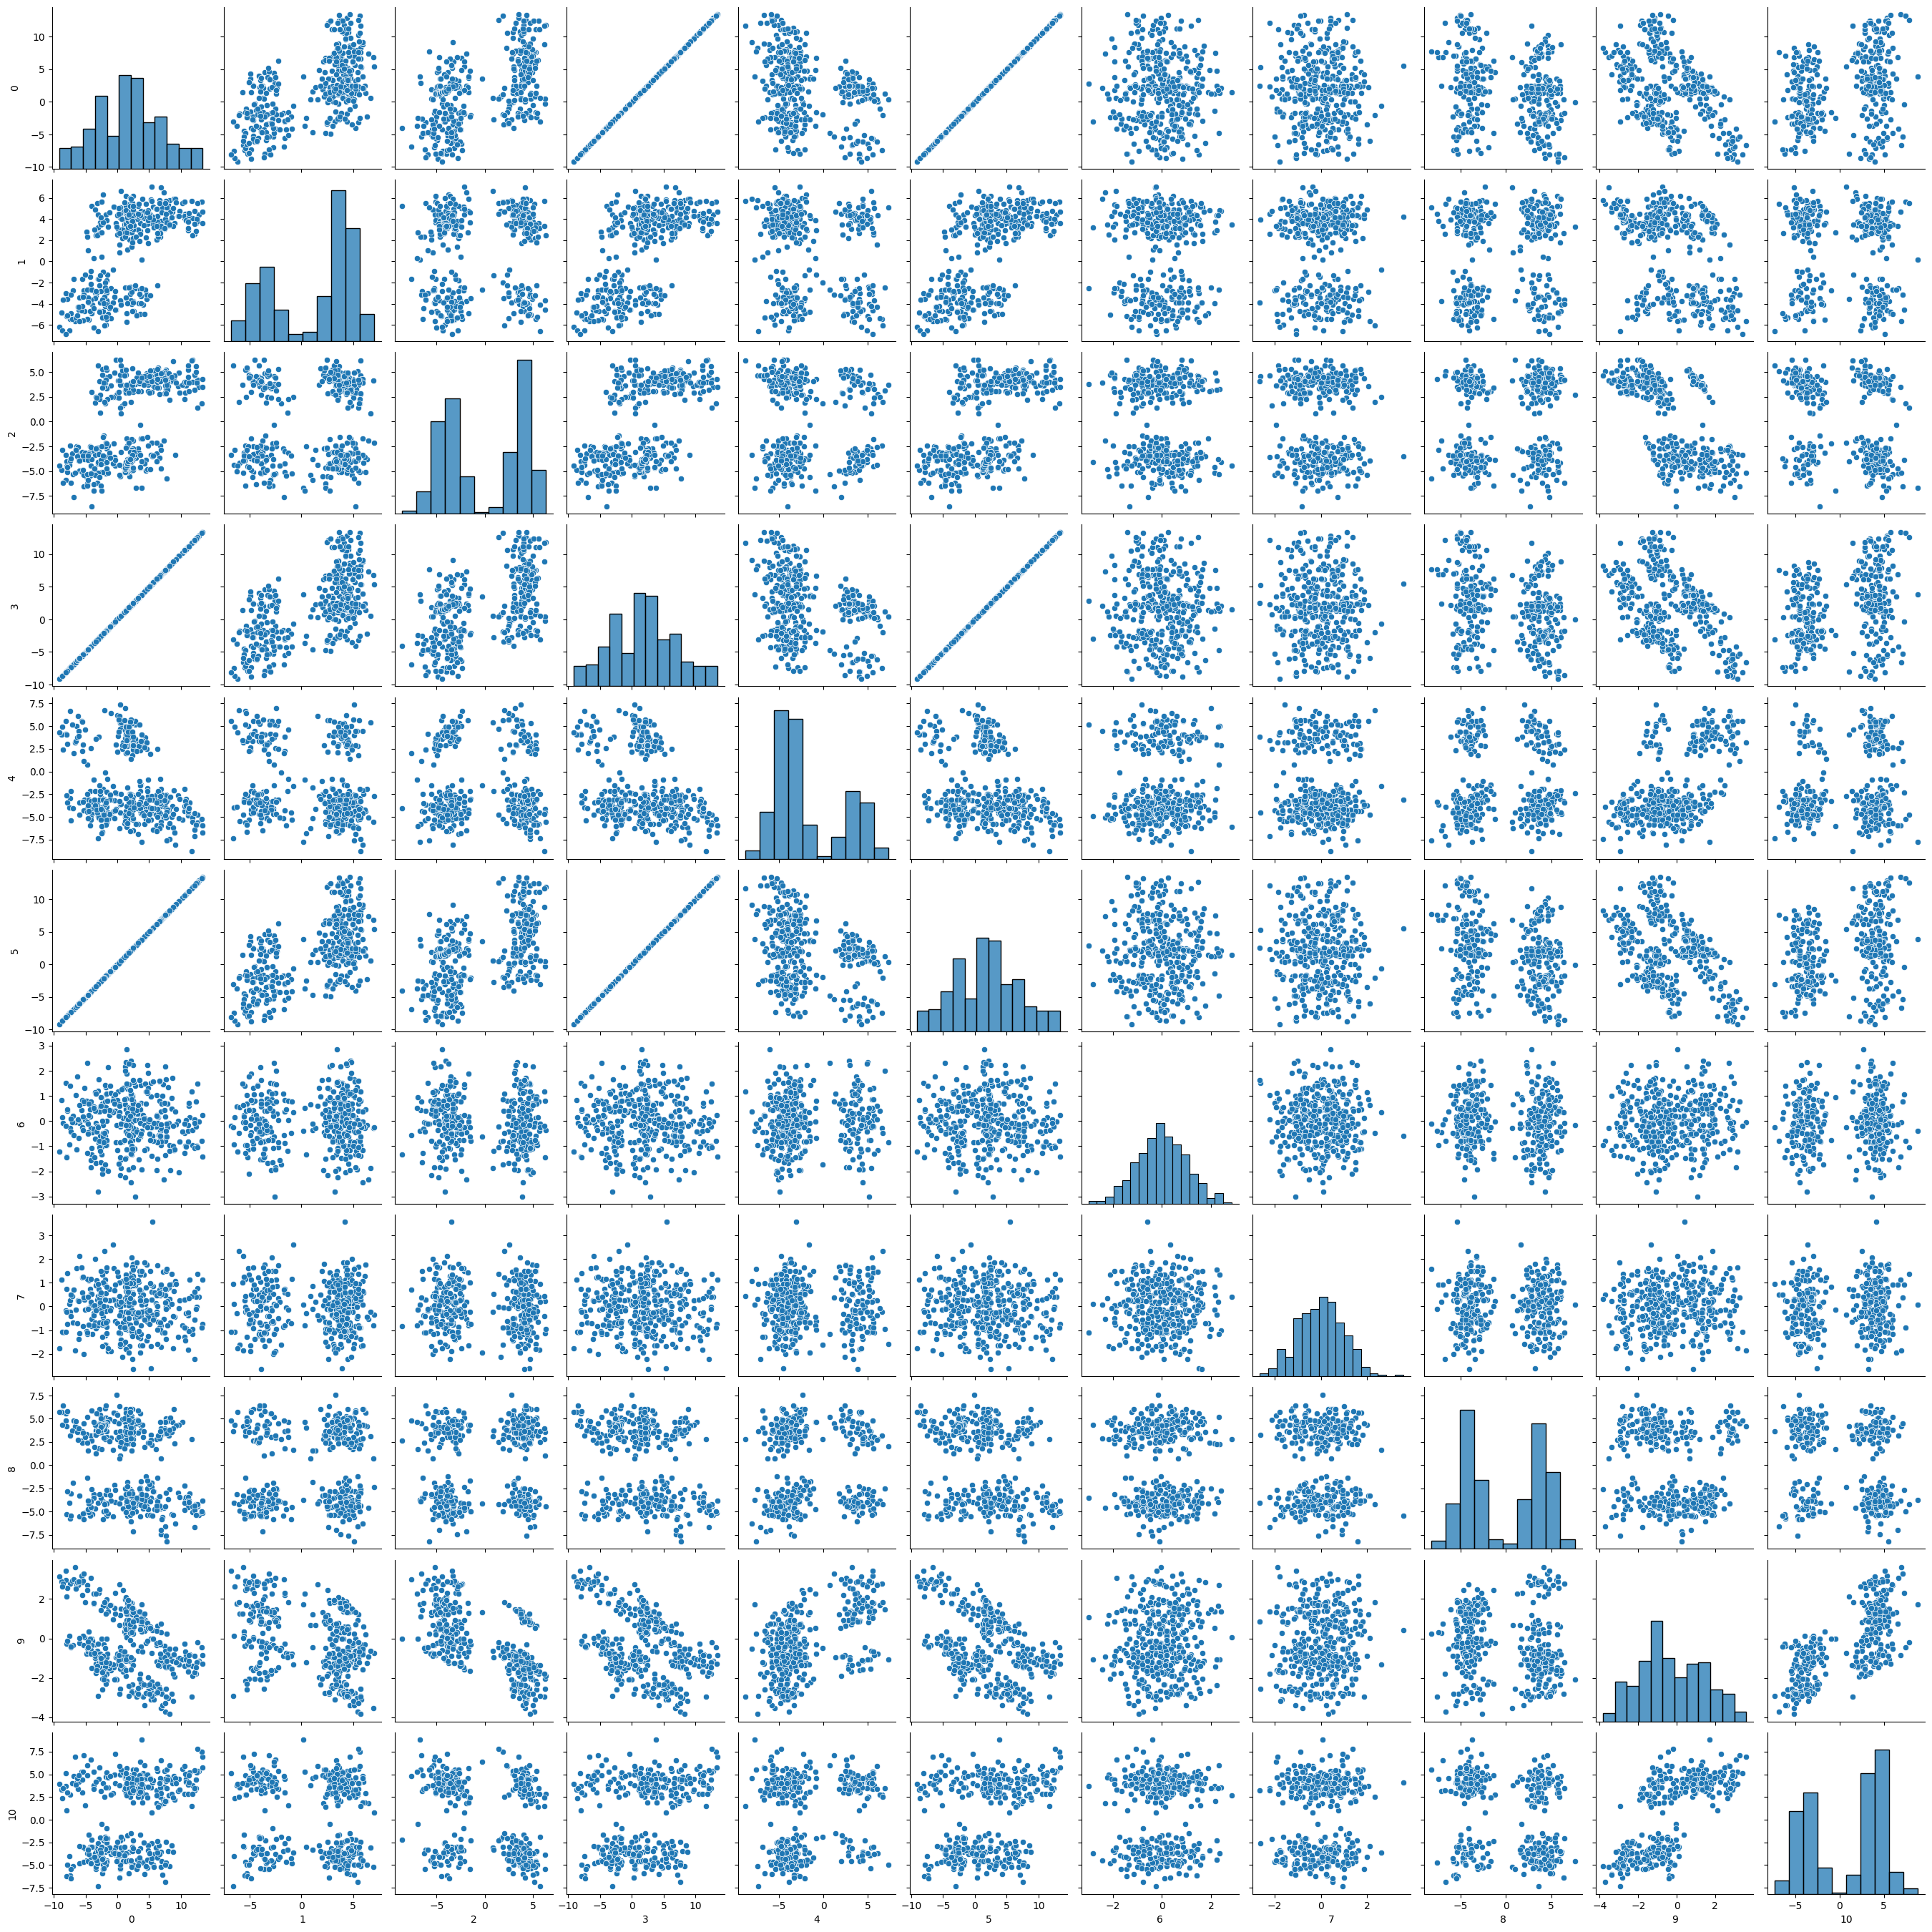

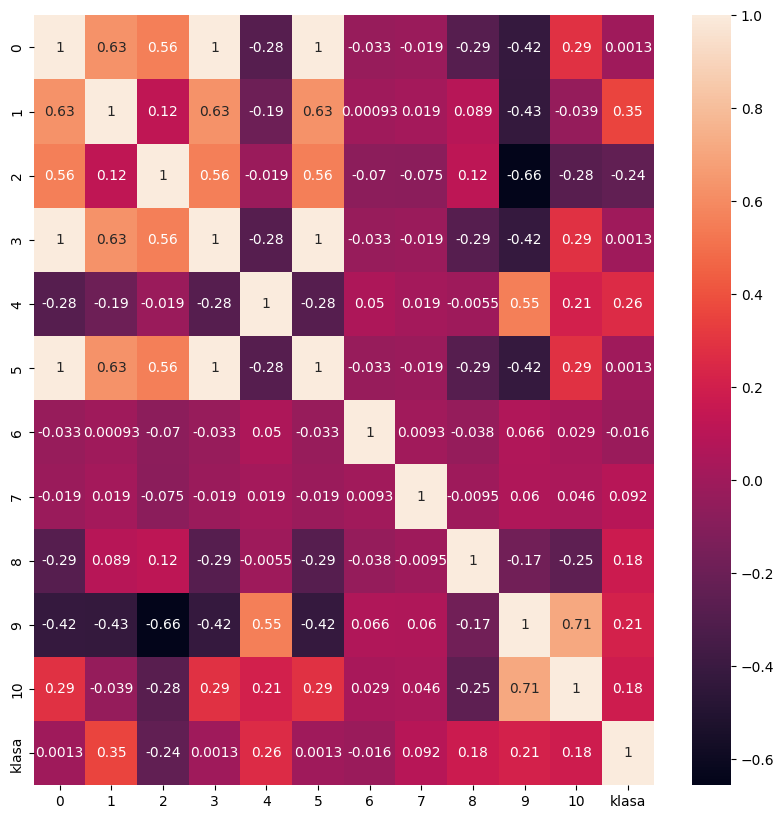

In [5]:
# wykres punktowy
daneT = dane1.loc[:, dane1.columns != 'klasa']
sns.pairplot(daneT, kind="scatter")
plt.show()


plt.figure(figsize=(10,10),dpi = 100)
sns.heatmap(dane1.corr(),annot = dane1.corr())
plt.show()

*wnioski*
* Bardzo dobre rozdzlenie klas dają atrybut 1,2,3,9 , które na każdym wykresie punktowym pokazuje podział na pewne skupiska Szczegółnie w 3 i 9 dobrze widać skupiska które nawet moga dochodzić do liczby 7 klas. 
* Macierz korelacji sugeruje dużą korelcja atrybutu 4 i 1 jeżeli chodzi o klasę to jest że ich wartość jest powiązana z klasą
* Atrybuty 3 i 0, 5 i 0, 5 i 3 są liniowe i skrelowane z współczynnikiem 1
* W atrybutach 6 i 7 prawie wogóle nie widać skupisk i podziału na klasy, mają też niskie współczynniki korelacji. 

---
Ocena czy i ewentualnie które atrybuty (zmienne, cechy) w zbiorze danych `dane1` były nadmiarowe.

In [6]:
daneT.cov()

,0,1,2,3,4,5,6,7,8,9,10
0,25.396031,12.528160,11.572936,25.396031,-5.656723,25.396031,-0.167951,-0.094701,-6.006216,-3.506043,5.983926
1,12.528160,15.548777,1.996930,12.528160,-2.976083,12.528160,0.003670,0.073009,1.469400,-2.791508,-0.637786
2,11.572936,1.996930,17.009752,11.572936,-0.312436,11.572936,-0.290008,-0.303636,2.025277,-4.460096,-4.694848
3,25.396031,12.528160,11.572936,25.396031,-5.656723,25.396031,-0.167951,-0.094701,-6.006216,-3.506043,5.983926
4,-5.656723,-2.976083,-0.312436,-5.656723,15.533520,-5.656723,0.196048,0.072222,-0.090772,3.598637,3.414076
5,25.396031,12.528160,11.572936,25.396031,-5.656723,25.396031,-0.167951,-0.094701,-6.006216,-3.506043,5.983926
6,-0.167951,0.003670,-0.290008,-0.167951,0.196048,-0.167951,0.998928,0.009110,-0.160311,0.109011,0.121721
7,-0.094701,0.073009,-0.303636,-0.094701,0.072222,-0.094701,0.009110,0.967978,-0.038810,0.097791,0.185370
8,-6.006216,1.469400,2.025277,-6.006216,-0.090772,-6.006216,-0.160311,-0.038810,17.386862,-1.194231,-4.339730
9,-3.506043,-2.791508,-4.460096,-3.506043,3.598637,-3.506043,0.109011,0.097791,-1.194231,2.712659,4.850934


*wnioski*
* Atrybuty 6 i 7 wydają się byc nieużteczne w klasyfkowaniu klas, nie pokazują na wykresach podzialu na grupu, żadna ze metryk nie wskazuje żadnej szczególności w żadnej z klas, ich odchylenie standrdowe i rozkład są taei same dla każdej klasy. 
* Atrybuty z par: 3 i 0, 5 i 0, 5 i 3, po jendym mogą zostać usunięte ze względu na korelacje 1. 